In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("train.csv")

In [3]:
# train.columns
# 基本統計量の表示
# train.SalePrice.describe()
# ヒストグラムの表示
# train.distplot(df.SalePrice)

In [4]:
train["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [5]:
# ｂｊｈｖｊｈ

In [6]:
# train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False).index

In [7]:
# train.loc[:,['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
#        'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
#        'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType',
#        'Electrical']]

In [8]:
train = train.fillna(0)

In [9]:
# train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

In [10]:
from sklearn.preprocessing import LabelEncoder
for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))

In [11]:
# No.7
# Label Encodeされた後の、SaleConditionカラムにセットされている値の一覧
train["BsmtQual"].unique()

array([3, 4, 1, 0, 2], dtype=int64)

In [12]:
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
# 欠損値の多いカラムを削除
train = train.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)

In [14]:
# train.loc[:,['YearBuilt','YearRemodAdd']]

In [15]:
# train['YearBuilt'][train['YearBuilt']!=train['YearRemodAdd']]=train['YearRemodAdd']

In [16]:
# train=train.drop(["YearRemodAdd","TotalBsmtSF"],axis=1)

In [17]:
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"] + train['GarageArea']
train['YearBuilt'] = 2011 - train['YearBuilt']
train['YearRemodAdd']=2011- train['YearRemodAdd']
train["TotalQual"]=train["TotalSF"] *train['OverallQual']
train["TotalBsmtSFQual"]=train["TotalBsmtSF"] *train['BsmtQual']
train['YearBuilt'][train['YearBuilt']!=train['YearRemodAdd']]=train['YearRemodAdd']

In [18]:
train=train.drop(["YearRemodAdd"],axis=1)

In [19]:
# train['TotalBsmtSF'][train['TotalBsmtSF']==0]=fillna(train['TotalBsmtSF'].mean())

In [20]:
train.drop(['1stFlrSF','GarageArea',"TotalBsmtSF","2ndFlrSF"], axis=1, inplace=True)

In [21]:
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]

In [22]:
train = np.log1p(train)

In [23]:
train = train[~(train['SalePrice'] < 11.1)]

In [24]:
rf_X = train.loc[:,train.columns != "SalePrice"]
rf_y = train.loc[:,["SalePrice"]]

In [25]:
from sklearn.model_selection import train_test_split
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.3, random_state=0)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(rf_X_train, rf_y_train)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

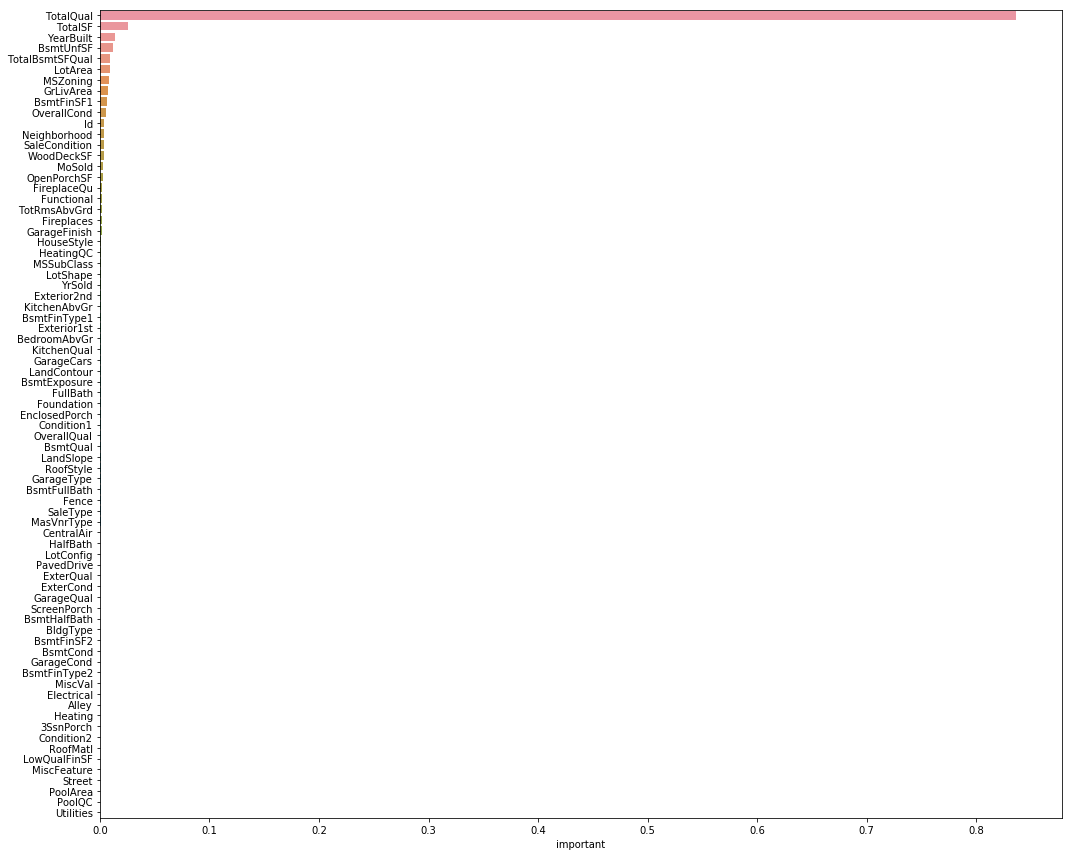

In [27]:
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=rf.feature_importances_[ranking], y=rf_X_train.columns.values[ranking], orient='h')
ax.set_xlabel("important")
plt.tight_layout()
# plt.savefig('figure10.png')

In [28]:
# ssssss

In [29]:
rf_X_train.iloc[:,ranking[:5]].columns

Index(['TotalQual', 'TotalSF', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSFQual'], dtype='object')

In [30]:
# train["TotalSF_2"]=train["TotalSF"]**2

In [31]:
X = train.loc[:,['TotalQual', 'TotalSF', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSFQual']]

In [32]:
# X=X.drop(['GrLivArea'], axis=1)

In [33]:
y = train.loc[:,["SalePrice"]]

In [34]:
X_y = pd.concat([X,y], axis =1)

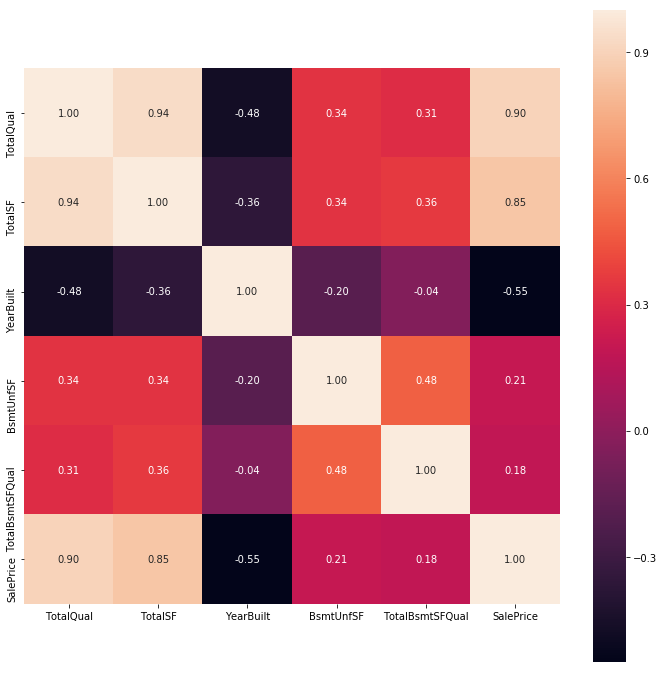

In [35]:
plt.figure(figsize=(12, 12))
sns.heatmap(X_y.corr(), annot=True, square=True, fmt='.2f')
plt.show()

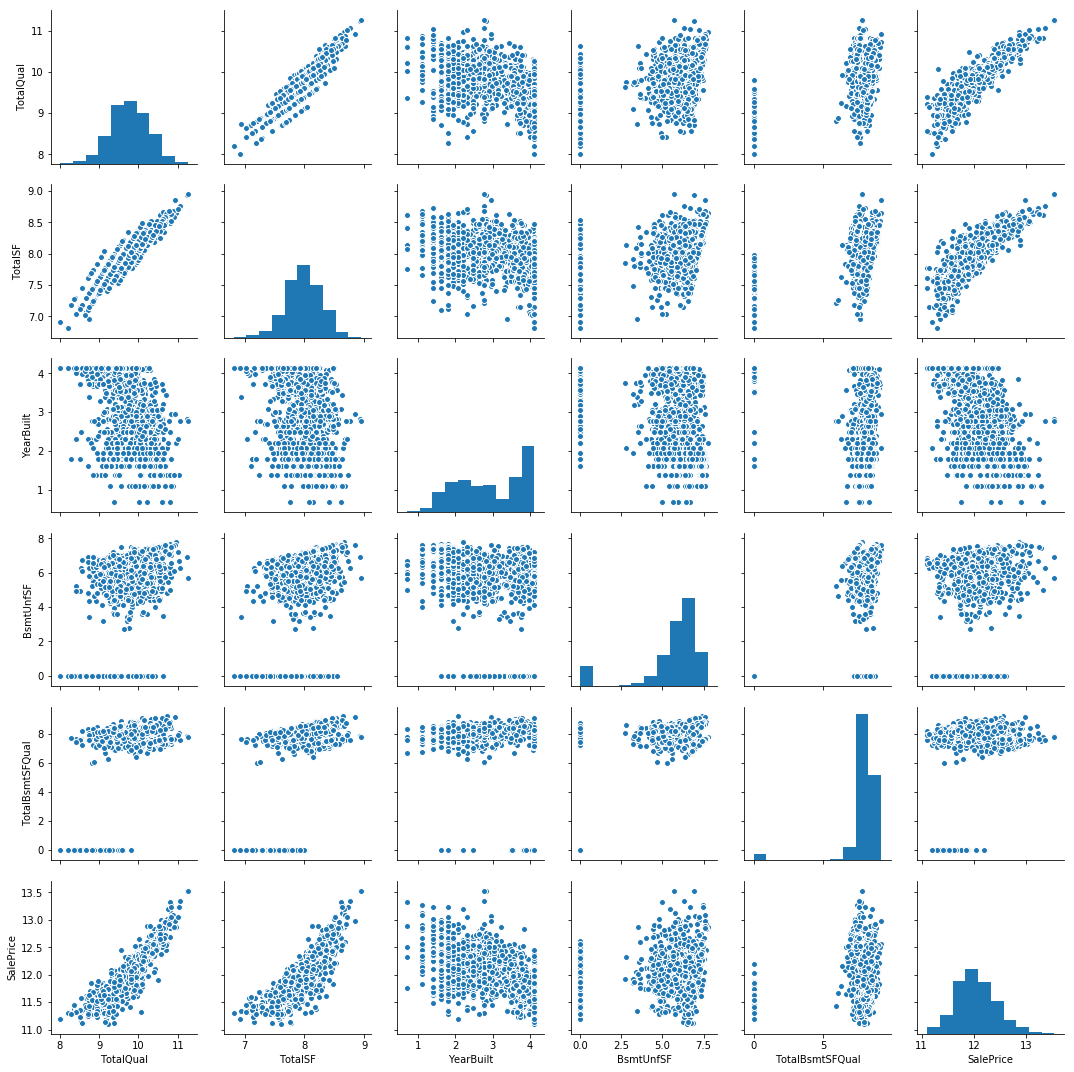

In [36]:
sns.pairplot(X_y)

In [37]:
# sns.boxplot(x="OverallQual", y="SalePrice", data=train)
# plt.savefig('figure10.png')

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


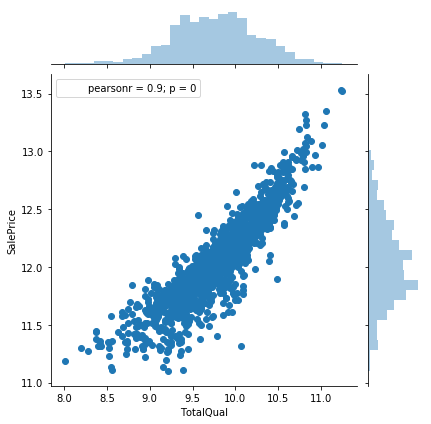

In [38]:
sns.jointplot("TotalQual","SalePrice",data= train)
# plt.savefig('figure11.png')

In [39]:
# sddd

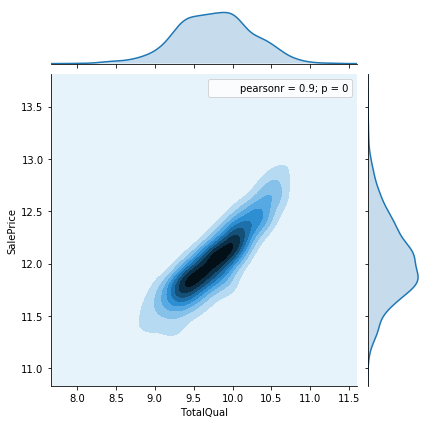

In [40]:
sns.jointplot('TotalQual', 'SalePrice', data=train, kind="kde")

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
las = Lasso(alpha=0.001)
las.fit(X_train, y_train)
print("ラッソ回帰でのRMSE：",np.sqrt(mean_squared_error(las.predict(X_test), y_test)))

ラッソ回帰でのRMSE： 0.14518186521978957


In [42]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# X_std = ss.fit_transform(X) #　正規化する
# y_std = ss.fit_transform(y) #　正規化する
# X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.25, random_state = 0) # trainと　testデータを分割

In [43]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error as mse
# # lr_std = LinearRegression() 
# # lr_std.fit(X_train,y_train) # 実際に学習させる。今回は線形回帰でやって見る
# las = Lasso(alpha=0.001)
# las.fit(X_train, y_train)
# print("ラッソ回帰でのRMSE：",np.sqrt(mean_squared_error(las.predict(X_test), y_test)))
# # print(mse(y_train,lr_std.predict(X_train))**(1/2)) 
# # print(mse(y_test,lr_std.predict(X_test))**(1/2))
# # print('train RMSE:%.3f'%(mse(y_train, lr_std.predict(X_train)) ** (1/2))) # 精度評価にはRMSEを今回は使う
# # print('test RMSE:%.3f'%(mse(y_test, lr_std.predict(X_test)) ** (1/2)))
# #  print("ラッソ回帰でのRMSE：",np.sqrt(mean_squared_error(las.predict(X_test), y_test)))

In [44]:
# from sklearn.linear_model import Ridge
# model_ridge = Ridge(alpha=5) 
# model_ridge.fit(X_train,y_train)

In [45]:
# print("ラッソ回帰でのRMSE：",np.sqrt(mean_squared_error(model_ridge.predict(X_test), y_test)))

In [46]:
# # 必要なライブラリのインポート
# from sklearn.ensemble import RandomForestRegressor
# # モデル構築、パラメータはデフォルト
# forest = RandomForestRegressor(max_depth=500)
# forest.fit(X_train, y_train)

In [47]:
# print(np.sqrt(mean_squared_error(forest.predict(X_test), y_test)))